In [1]:
import sys
sys.path.append("..")
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from LowLevelModules.GeneralFunctions import *
from LowLevelModules.NIdaqAPD import *
from collections import deque

"""#######################################   USER INPUT   #################################################"""
terminal = '/Dev1/PFI0'
frequency = 5    # Hz
max_data_before_refresh = 30*frequency
save_data = False
"""#########################################################################################################"""

delta_t = 1 / frequency

<IPython.core.display.Javascript object>


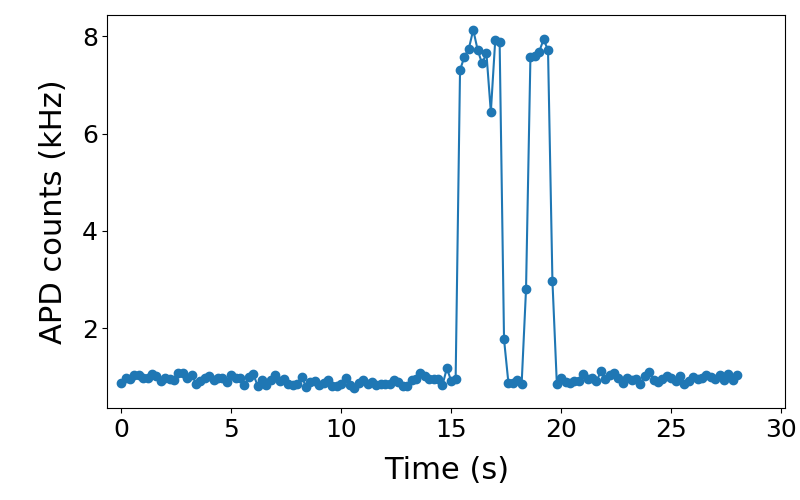

In [3]:
import time

lp = LivePlot(1, 1, 8, 5, 'o', 'Time (s)', 'APD counts (kHz)')
# CREATE EXT CLOCK TO GATE THE READING OF PULSES COMING FROM THE APD
ext_clock_task = ExtClock(frequency, task_name='Clock count rate')
# CREATE THE APD COUNTER
APD1 = APDCounter(terminal, task_name='Count rate')
APD1.sync_to_ext_clock()
APD1.start()

i, old_cts_cum = 0, 0
t = deque(maxlen=max_data_before_refresh)
cts = deque(maxlen=max_data_before_refresh)
while True: 
    try:
        cts_cum = APD1.read() / 1000
        current_cts = (cts_cum - old_cts_cum) * frequency

        # append new data and plot
        t.append(i*delta_t)
        cts.append(current_cts)
        #if not i%int(frequency/2):
        lp.plot_live(t, cts)
        # store old data and go to next loop iteration
        old_cts_cum = cts_cum
        i += 1
        
    except KeyboardInterrupt:
        # press the stop button to trigger this
        APD1.close()
        ext_clock_task.close()
        break

        
if save_data:
    data_type = 'PLvsTime'
    data_header = "Time (s)     APD counts (kHz)"
    data_array = np.array([pos, cts]).T
    data_save(data_array, lp.fig, data_type, data_header)

In [4]:
# just in case this needs to be done manually
APD1.close()
ext_clock_task.close()

c:\users\fuchsdiamond\appdata\local\programs\python\python37\lib\site-packages\nidaqmx\task.py:463: ResourceWarning: Attempted to close NI-DAQmx task of name "Count rate" but task was already closed.
  'already closed.'.format(self._saved_name), DaqResourceWarning)
c:\users\fuchsdiamond\appdata\local\programs\python\python37\lib\site-packages\nidaqmx\task.py:463: ResourceWarning: Attempted to close NI-DAQmx task of name "Clock count rate" but task was already closed.
  'already closed.'.format(self._saved_name), DaqResourceWarning)
